In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/GCC_PlanningRegisterSites_16.csv'
dataset = pd.read_csv(file_path)

In [ ]:
dataset.info()
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBJECTID                16635 non-null  int64  
 1   County                  16635 non-null  object 
 2   PlanningAuthority       16635 non-null  object 
 3   ApplicantName           16635 non-null  object 
 4   ApplicationNumber       16635 non-null  int64  
 5   ReceivedDate            16635 non-null  object 
 6   ApplicationType         16635 non-null  object 
 7   ApplicationStatus       16635 non-null  object 
 8   Location                16635 non-null  object 
 9   Description             16635 non-null  object 
 10  Decision                16635 non-null  object 
 11  DecisionDate            16635 non-null  object 
 12  DecisionDueDate         16635 non-null  object 
 13  WithdrawnDate           16635 non-null  object 
 14  GrantDate               16635 non-null

In [ ]:
date_columns = ['ReceivedDate', 'DecisionDate', 'DecisionDueDate',
                'WithdrawnDate', 'GrantDate', 'ExpiryDate',
                'AppealNotificationDate', 'AppealDecisionDate']

for col in date_columns:
    dataset[col] = pd.to_datetime(dataset[col], errors='coerce')


<ipython-input-3-457ef6e3ee8b>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset[col] = pd.to_datetime(dataset[col], errors='coerce')
<ipython-input-3-457ef6e3ee8b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[col] = pd.to_datetime(dataset[col], errors='coerce')
<ipython-input-3-457ef6e3ee8b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[col] = pd.to_datetime(dataset[col], errors='coerce')
<ipython-input-3-457ef6e3ee8b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and 

In [ ]:
print(dataset.describe())

            OBJECTID  ApplicationNumber                   ReceivedDate  \
count   16635.000000       1.663500e+04                           6232   
mean   137286.388037       5.326199e+05  2020-05-03 15:58:55.301668864   
min    128967.000000       1.610000e+02            2016-01-02 00:00:00   
25%    133125.500000       1.983350e+04            2018-04-10 00:00:00   
50%    137284.000000       1.713330e+05            2020-07-08 00:00:00   
75%    141442.500000       2.117775e+05            2022-04-16 00:00:00   
max    145631.000000       2.461002e+06            2024-12-07 00:00:00   
std      4806.024647       8.933544e+05                            NaN   

                        DecisionDate                DecisionDueDate  \
count                          14310                           5619   
mean   2020-07-28 16:49:30.566037760  2020-08-11 23:50:15.696743168   
min              2016-02-16 00:00:00            2016-01-03 00:00:00   
25%              2018-08-14 00:00:00            2

In [ ]:
print(dataset.isnull().sum())

dataset.fillna('n/a', inplace=True)

OBJECTID                      0
County                        0
PlanningAuthority             0
ApplicantName                 0
ApplicationNumber             0
ReceivedDate              10403
ApplicationType               0
ApplicationStatus             0
Location                      0
Description                   0
Decision                      0
DecisionDate               2325
DecisionDueDate           11016
WithdrawnDate             15458
GrantDate                 12128
ExpiryDate                11964
AppealNotificationDate    16107
AppealRefNum                  1
AppealDecision               65
AppealDecisionDate        16192
MoreInfo                      0
GlobalID                      0
Shape__Area                   0
Shape__Length                 0
dtype: int64


<ipython-input-5-b61e35cc2e64>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'n/a' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  dataset.fillna('n/a', inplace=True)


In [ ]:
galway_data = dataset[dataset['County'] == 'Galway']

galway_cc_data = dataset[dataset['PlanningAuthority'] == 'Galway County Council']

In [ ]:
status_counts = dataset['ApplicationStatus'].value_counts()
print(status_counts)

ApplicationStatus
Application Finalised    14072
Withdrawn                  908
Incompleted App            719
Deemed Withdrawal          272
New Application            263
Decision Made              182
Further Information        145
Appealed                    55
Pre-Validation              13
Appealed Financial           3
n\a                          3
Name: count, dtype: int64


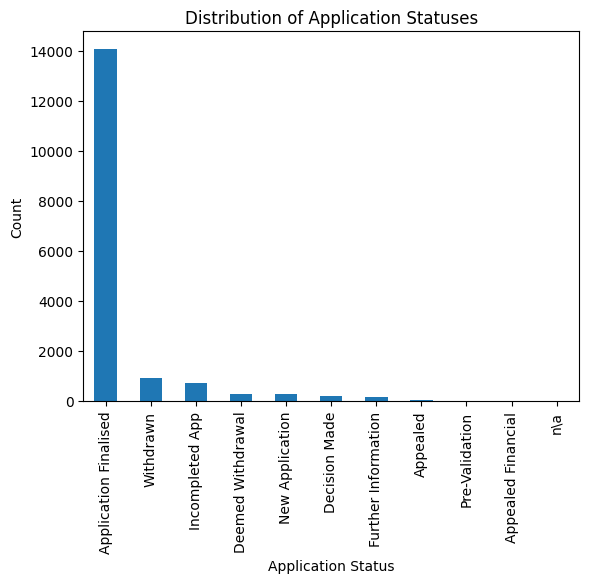

In [ ]:
import matplotlib.pyplot as plt

status_counts.plot(kind='bar')
plt.title('Distribution of Application Statuses')
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.show()

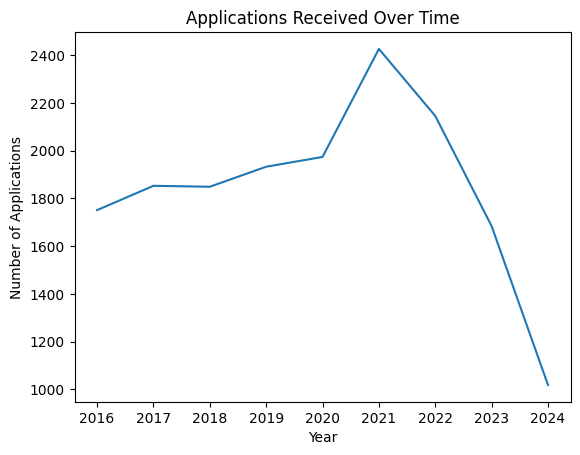

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/GCC_PlanningRegisterSites_16.csv'
dataset = pd.read_csv(file_path)

dataset['ReceivedDate'] = pd.to_datetime(dataset['ReceivedDate'], format='%d/%m/%Y', errors='coerce')

dataset['YearReceived'] = dataset['ReceivedDate'].dt.year

applications_per_year = dataset['YearReceived'].value_counts().sort_index()

applications_per_year.plot(kind='line')
plt.title('Applications Received Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.show()


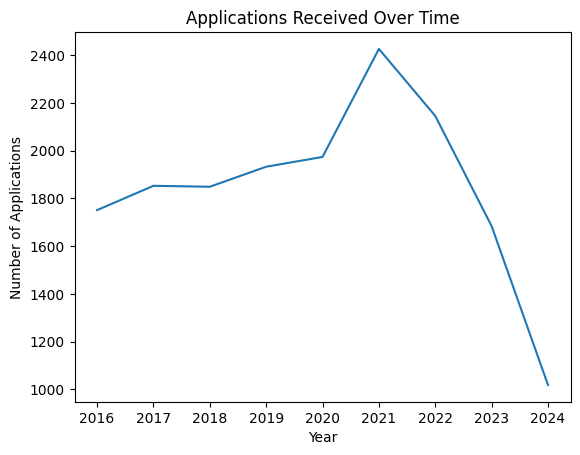

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of applications received per year
applications_per_year.plot(kind='line')
plt.title('Applications Received Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.show()

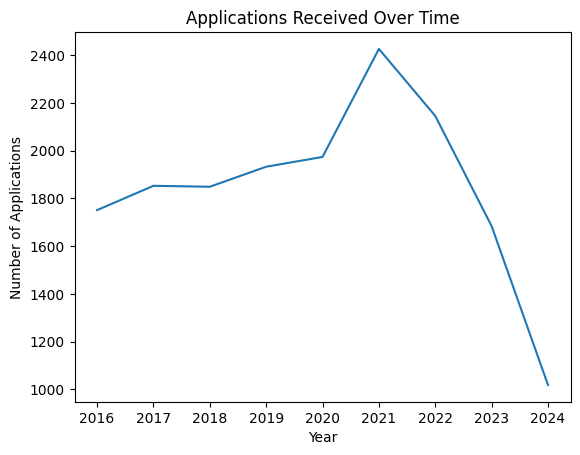

In [ ]:
dataset['YearReceived'] = dataset['ReceivedDate'].dt.year

applications_per_year = dataset['YearReceived'].value_counts().sort_index()

applications_per_year.plot(kind='line')
plt.title('Applications Received Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.show()

In [ ]:
output_path = '/content/GCC_PlanningRegisterSites_16.csv'
dataset.to_csv(output_path, index=False)

In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values[missing_values > 0])

dataset.fillna('n/a', inplace=True)

AppealRefNum       1
AppealDecision    65
dtype: int64


In [ ]:
date_columns = ['ReceivedDate', 'DecisionDate', 'DecisionDueDate',
                'WithdrawnDate', 'GrantDate', 'ExpiryDate',
                'AppealNotificationDate', 'AppealDecisionDate']

for col in date_columns:
    dataset[col] = pd.to_datetime(dataset[col], format='%d/%m/%Y', errors='coerce')

In [ ]:
print(dataset.describe())
print(dataset.describe(include=['object']))

            OBJECTID  ApplicationNumber                   ReceivedDate  \
count   16635.000000       1.663500e+04                          16635   
mean   137286.388037       5.326199e+05  2020-05-11 22:20:01.082055680   
min    128967.000000       1.610000e+02            2016-01-04 00:00:00   
25%    133125.500000       1.983350e+04            2018-05-03 00:00:00   
50%    137284.000000       1.713330e+05            2020-07-16 00:00:00   
75%    141442.500000       2.117775e+05            2022-04-15 00:00:00   
max    145631.000000       2.461002e+06            2024-08-08 00:00:00   
std      4806.024647       8.933544e+05                            NaN   

                        DecisionDate                DecisionDueDate  \
count                          14310                          14598   
mean   2020-07-28 16:49:30.566037760  2020-08-28 00:02:22.046855680   
min              2016-02-16 00:00:00            2016-02-29 00:00:00   
25%              2018-08-14 00:00:00            2

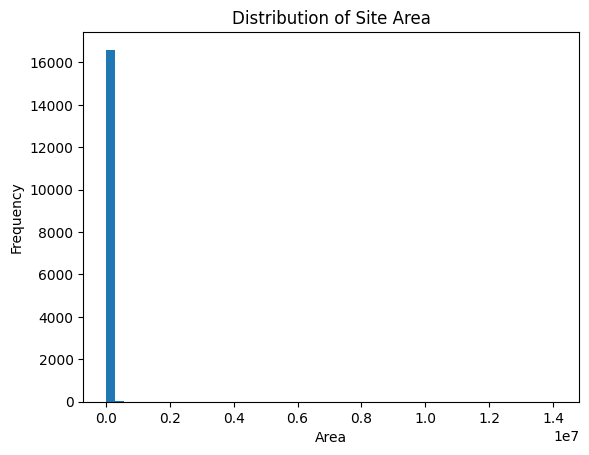

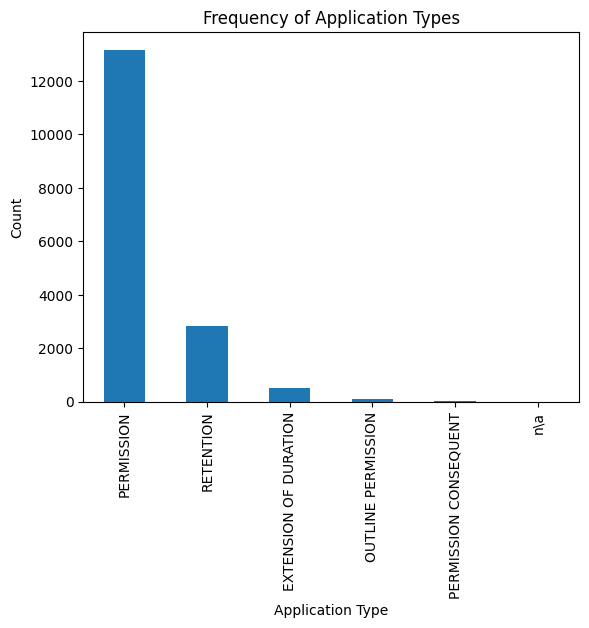

In [ ]:
dataset['Shape__Area'].plot(kind='hist', bins=50)
plt.title('Distribution of Site Area')
plt.xlabel('Area')
plt.show()
dataset['ApplicationType'].value_counts().plot(kind='bar')
plt.title('Frequency of Application Types')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.show()

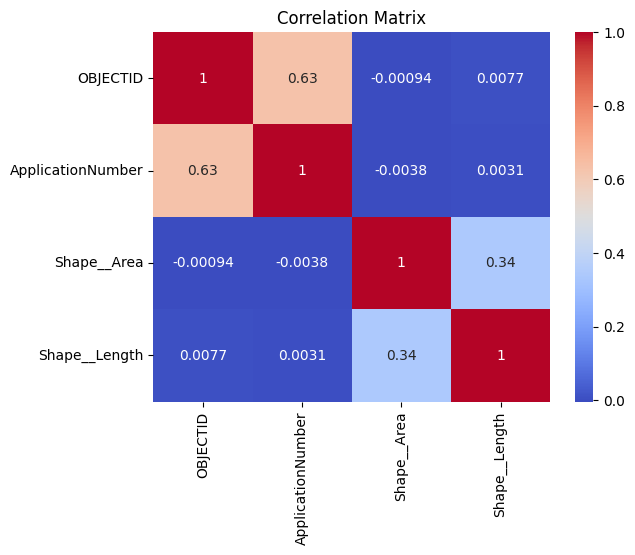

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_data = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
dataset['DecisionDuration'] = (dataset['DecisionDate'] - dataset['ReceivedDate']).dt.days

dataset['AppealMade'] = dataset['AppealRefNum'].notnull().astype(int)

In [ ]:
dataset = pd.get_dummies(dataset, columns=['County', 'PlanningAuthority', 'ApplicationType'])


In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns=['DecisionDuration', 'OBJECTID', 'ApplicantName', 'ApplicationNumber'])
y = dataset['DecisionDuration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(y_train.isnull().sum())

1608


In [ ]:
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

In [ ]:
y_train.fillna(y_train.mean(), inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
if 'datetime_column' in X_train.columns:
    X_train['datetime_column'] = X_train['datetime_column'].astype(int) / 10**9
else:
    print("Column 'datetime_column' not found in X_train DataFrame.")

Column 'datetime_column' not found in X_train DataFrame.


In [ ]:
if 'ReceivedDate' in X_train.columns:
    X_train['year'] = X_train['ReceivedDate'].dt.year
    X_train['month'] = X_train['ReceivedDate'].dt.month
    X_train['day'] = X_train['ReceivedDate'].dt.day
else:
    print("Column 'ReceivedDate' not found in X_train DataFrame.")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

for col in X_train.columns:
    if X_train[col].dtype == 'datetime64[ns]':
        X_train[col] = X_train[col].astype(int) / 10**9
    elif X_train[col].dtype == 'object':
        try:
            X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        except:
            print(f"Could not convert column '{col}' to numeric. Consider encoding or dropping.")
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['ApplicationStatus' 'Location' 'Description' 'Decision' 'AppealDecision'
 'MoreInfo' 'GlobalID']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


RandomForestRegressor(random_state=42)